In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

Loading Dataset

In [19]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test)= mnist.load_data()

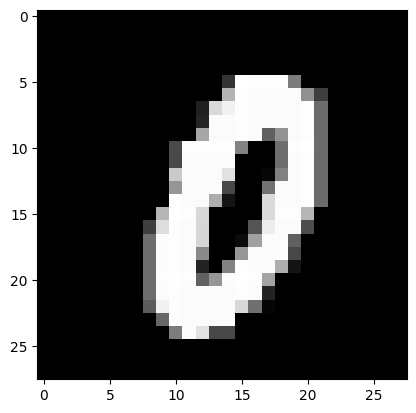

In [20]:
plt.imshow(x_train[34],cmap='gray')
plt.show()

In [21]:
x_train.shape

(60000, 28, 28)

preprocessing

In [22]:
x_train=x_train.reshape((-1,28,28,1)).astype('float32')/255
x_test=x_test.reshape((-1,28,28,1)).astype('float32')/255
x_train.shape

(60000, 28, 28, 1)

model definition

In [23]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'] )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 128)       512       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 26, 26, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)       

In [24]:
hist=model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
235/235 [==============================] - 9s 22ms/step - loss: 0.4325 - accuracy: 0.8666 - val_loss: 6.3722 - val_accuracy: 0.1135
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1011 - accuracy: 0.9714 - val_loss: 4.0855 - val_accuracy: 0.2011
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0762 - accuracy: 0.9787 - val_loss: 0.0888 - val_accuracy: 0.9754
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0613 - accuracy: 0.9826 - val_loss: 0.0944 - val_accuracy: 0.9743
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0520 - accuracy: 0.9853 - val_loss: 0.0570 - val_accuracy: 0.9836
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0447 - accuracy: 0.9876 - val_loss: 0.0488 - val_accuracy: 0.9868
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0392 - accuracy: 0.9884 - val_loss: 0.0580 - val_accuracy: 0.9849

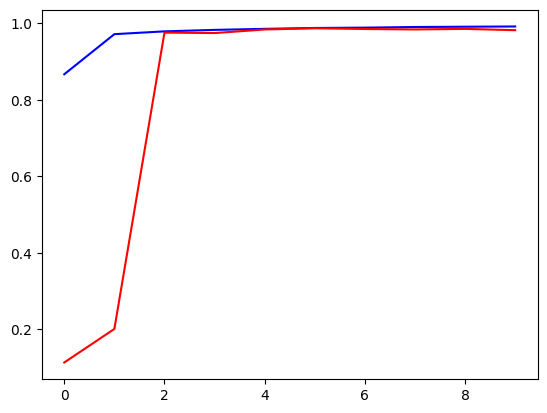

In [25]:
plt.plot(hist.history['accuracy'],color='blue')
plt.plot(hist.history['val_accuracy'],color='red')